# Target Customer Analysis

## Step-1: Import required libraries

In [244]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
import plotly.express as px

## Step-2: Load and Explore Data

In [245]:
demographics = pd.read_csv("dataset/demographicData.csv")
two_wheeler = pd.read_csv("dataset/2-Wheeler.csv")
ev_maker_place = pd.read_csv("dataset/EV-Maker-by-Place.csv")
final_dataset = pd.read_csv("dataset/final_dataset.csv")

In [246]:
demographics.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000


In [247]:
two_wheeler.head()

,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money,Model Name,review
0,Daily Commute,Never owned,NaN,1,3.0,4.0,NaN,NaN,NaN,4.0,NaN,1.0,TVS iQube,We all checked the bike's capacity to be 150 k...
1,Everything,> 1 yr,< 5000 kms,1,3.0,1.0,NaN,1.0,NaN,3.0,NaN,3.0,TVS iQube,Performance is very poor on this bike. The cha...
2,Daily Commute,< 3 months,< 5000 kms,3,4.0,4.0,NaN,2.0,NaN,5.0,NaN,2.0,TVS iQube,I purchased this in April 2022 and the sales s...
3,Daily Commute,6 months-1 yr,5000-10000 kms,1,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,TVS iQube,If any issues come in scooty parts not availab...
4,Daily Commute,6 months-1 yr,< 5000 kms,1,3.0,4.0,NaN,1.0,NaN,3.0,NaN,2.0,TVS iQube,Don't buy this vehicle unless you have a near ...


In [248]:
ev_maker_place.head()

,EV Maker,Place,State
0,Tata Motors,Pune,Maharashtra
1,Mahindra Electric,Bengaluru,Karnataka
2,Ather Energy,Bengaluru,Karnataka
3,Hero Electric,New Delhi,Delhi
4,Ola Electric,Krishnagiri,Tamil Nadu


In [249]:
final_dataset.head()

,S.No,State Name,Two Wheeler,Three Wheeler,Four Wheeler,Goods Vehicles,Public Service Vehicle,Special Category Vehicles,Ambulance/Hearses,Construction Equipment Vehicle,Other,Grand Total,total-charging-stations
0,0,Andaman and Nicobar Island,1,30,81,0,40,0,0,0,7,159,NaN
1,1,Arunachal Pradesh,14,0,5,0,0,0,0,0,1,20,NaN
2,2,Assam,721,47041,161,7,15,0,0,0,2,47947,10.0
3,3,Bihar,5003,59079,114,11,26,0,0,0,8,64241,9.0
4,4,Chandigarh,298,1410,182,0,40,0,0,0,1,1931,2.0


## Step-3: Data Pre-processing

### Data Cleaning

In [250]:
# Shape of the dataset
print(demographics.shape)
print(two_wheeler.shape)
print(ev_maker_place.shape)
print(final_dataset.shape)

(99, 13)
(844, 14)
(62, 3)
(32, 13)


### Check for missing values

In [251]:
print("Missing values in Demographics Data:\n") 
demographics.isnull().sum()

Missing values in Demographics Data:



Age                 0
Profession          0
Marrital Status     0
Education           0
No of Dependents    0
Personal loan       0
House Loan          0
Wife Working        0
Salary              0
Wife Salary         0
Total Salary        0
Make                0
Price               0
dtype: int64

In [252]:
print("Missing values in Two-Wheeler Data:\n") 
two_wheeler.isnull().sum()

Missing values in Two-Wheeler Data:



Used it for             0
Owned for               0
Ridden for            176
rating                  0
Visual Appeal         105
Reliability           128
Performance           499
Service Experience    141
Extra Features        659
Comfort               314
Maintenance cost      664
Value for Money       454
Model Name              0
review                 47
dtype: int64

In [253]:
print("Missing values in EV Maker Place Data:\n") 
ev_maker_place.isnull().sum()

Missing values in EV Maker Place Data:



EV Maker    0
Place       0
State       0
dtype: int64

In [254]:
print("Missing values in Final Dataset Data:\n") 
final_dataset.isnull().sum()

Missing values in Final Dataset Data:



S.No                              0
State Name                        0
Two Wheeler                       0
Three Wheeler                     0
Four Wheeler                      0
Goods Vehicles                    0
Public Service Vehicle            0
Special Category Vehicles         0
Ambulance/Hearses                 0
Construction Equipment Vehicle    0
Other                             0
Grand Total                       0
total-charging-stations           8
dtype: int64

In [255]:
# Fill missing values in numerical columns with median
num_cols = ['Performance', 'Comfort', 'Value for Money', 'Maintenance cost']
two_wheeler[num_cols] = two_wheeler[num_cols].apply(lambda col: col.fillna(col.median()))

In [256]:
# Fill missing values in some of the numerical columns with mode
cat_cols = ['Ridden for', 'Visual Appeal', 'Reliability', 'Service Experience', 'Extra Features']
two_wheeler[cat_cols] = two_wheeler[cat_cols].apply(lambda col: col.fillna(col.mode()[0]))

In [257]:
# Fill missing values in the review column with 'No Review'
two_wheeler['review'] = two_wheeler['review'].fillna("No Review")

In [258]:
# Verify missing values are handled
print(two_wheeler.isnull().sum())

Used it for           0
Owned for             0
Ridden for            0
rating                0
Visual Appeal         0
Reliability           0
Performance           0
Service Experience    0
Extra Features        0
Comfort               0
Maintenance cost      0
Value for Money       0
Model Name            0
review                0
dtype: int64


### Data Normalization

In [259]:
# Applying log transformation to reduce skewness in salary
demographics['Log_Salary'] = np.log1p(demographics['Salary'])

In [260]:
demographics.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price,Log_Salary
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000,13.592368
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000,14.151984
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000,14.403298
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000,14.285515
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000,14.403298


In [261]:
# Applying log transformation to reduce skewness in salary
demographics['Log_Salary'] = np.log1p(demographics['Salary'])

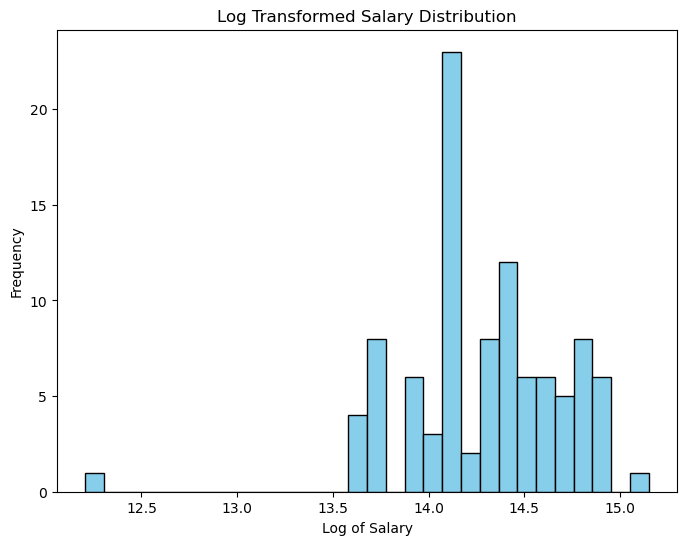

In [262]:
plt.figure(figsize=(8, 6))
plt.hist(demographics['Log_Salary'], bins=30, color='skyblue', edgecolor='black')
plt.title('Log Transformed Salary Distribution')
plt.xlabel('Log of Salary')
plt.ylabel('Frequency')
plt.show()

### Correlation Matrix

In [263]:
# Filter out non-numeric columns for correlation calculation
numeric_columns = demographics.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()
correlation_matrix

,Age,No of Dependents,Salary,Wife Salary,Total Salary,Price,Log_Salary
Age,1.000000,0.543675,0.656442,0.288546,0.587082,0.376661,0.603188
No of Dependents,0.543675,1.000000,0.273921,0.102010,0.234379,0.088822,0.242074
Salary,0.656442,0.273921,1.000000,0.347934,0.841545,0.547630,0.942899
Wife Salary,0.288546,0.102010,0.347934,1.000000,0.799238,0.635858,0.328559
Total Salary,0.587082,0.234379,0.841545,0.799238,1.000000,0.717442,0.793776
Price,0.376661,0.088822,0.547630,0.635858,0.717442,1.000000,0.510663
Log_Salary,0.603188,0.242074,0.942899,0.328559,0.793776,0.510663,1.000000


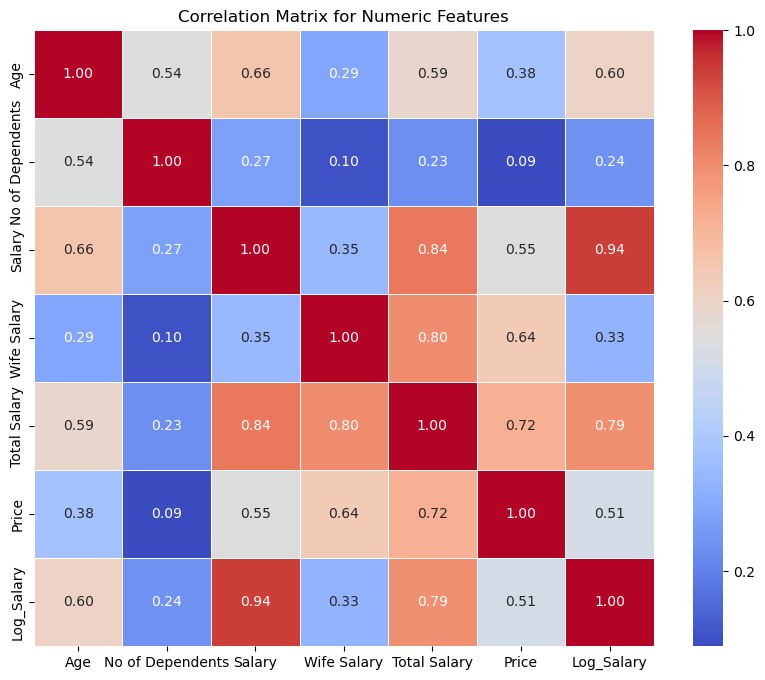

In [264]:
# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix for Numeric Features')
plt.show()

### Label Encoding

In [265]:
label_encoder = LabelEncoder()
demographics['Profession'] = label_encoder.fit_transform(demographics['Profession'])
two_wheeler['Model Name'] = label_encoder.fit_transform(two_wheeler['Model Name'])

# Normalize numerical columns
scaler = StandardScaler()
demographics[['Age', 'Salary', 'Total Salary']] = scaler.fit_transform(demographics[['Age', 'Salary', 'Total Salary']])

In [266]:
demographics.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price,Log_Salary
0,-1.498630,1,Single,Post Graduate,0,Yes,No,No,-1.397118,0,-1.406760,i20,800000,13.592368
1,-0.211304,1,Married,Post Graduate,2,Yes,Yes,Yes,-0.501877,600000,-0.258937,Ciaz,1000000,14.151984
2,1.397855,0,Married,Graduate,4,Yes,Yes,No,0.094950,0,-0.450240,Duster,1200000,14.403298
3,0.754191,0,Married,Post Graduate,3,No,No,Yes,-0.203464,600000,-0.067633,City,1200000,14.285515
4,-0.854967,1,Married,Post Graduate,2,Yes,No,Yes,0.094950,800000,0.314975,SUV,1600000,14.403298


In [267]:
two_wheeler.head()

,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money,Model Name,review
0,Daily Commute,Never owned,< 5000 kms,1,3.0,4.0,4.0,5.0,1.0,4.0,4.0,1.0,33,We all checked the bike's capacity to be 150 k...
1,Everything,> 1 yr,< 5000 kms,1,3.0,1.0,4.0,1.0,1.0,3.0,4.0,3.0,33,Performance is very poor on this bike. The cha...
2,Daily Commute,< 3 months,< 5000 kms,3,4.0,4.0,4.0,2.0,1.0,5.0,4.0,2.0,33,I purchased this in April 2022 and the sales s...
3,Daily Commute,6 months-1 yr,5000-10000 kms,1,1.0,1.0,4.0,1.0,1.0,1.0,4.0,1.0,33,If any issues come in scooty parts not availab...
4,Daily Commute,6 months-1 yr,< 5000 kms,1,3.0,4.0,4.0,1.0,1.0,3.0,4.0,2.0,33,Don't buy this vehicle unless you have a near ...


## Step-4: Segmentation Extraction

### Demographic Analysis (Age, Salary, Profession)

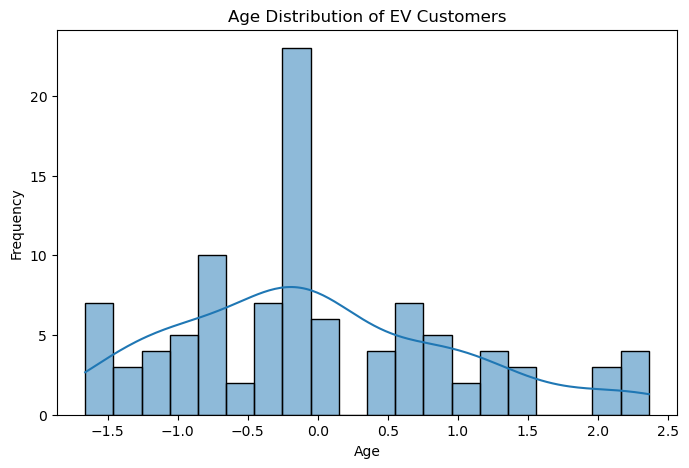

In [268]:
# Age Distribution
plt.figure(figsize=(8, 5))
sns.histplot(demographics["Age"], bins=20, kde=True)
plt.title("Age Distribution of EV Customers")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

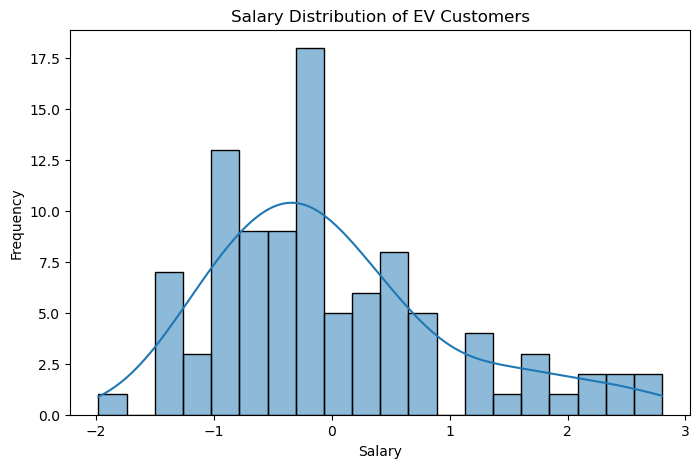

In [269]:
# Salary Distribution
plt.figure(figsize=(8, 5))
sns.histplot(demographics["Total Salary"], bins=20, kde=True)
plt.title("Salary Distribution of EV Customers")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.show()

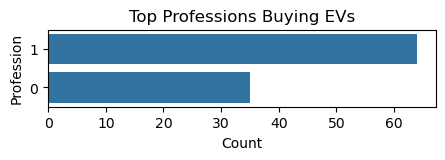

In [270]:
# Profession Analysis
plt.figure(figsize=(5, 1))
sns.countplot(y=demographics["Profession"], order=demographics["Profession"].value_counts().index)
plt.title("Top Professions Buying EVs")
plt.xlabel("Count")
plt.ylabel("Profession")
plt.show()

### **Demographic Analysis**  
- **Age Group Most Interested in EVs:** 35 to 40 years  
- **Income Range of EV Customers:**  
  - Highest salary observed: **20 lakh**  
  - Most frequent salary range: **12 lakh**  
- **Professions Most Likely to Purchase an EV:** Salaried employees

### Behavioral Analysis (How people use the 2-wheeler EVs)

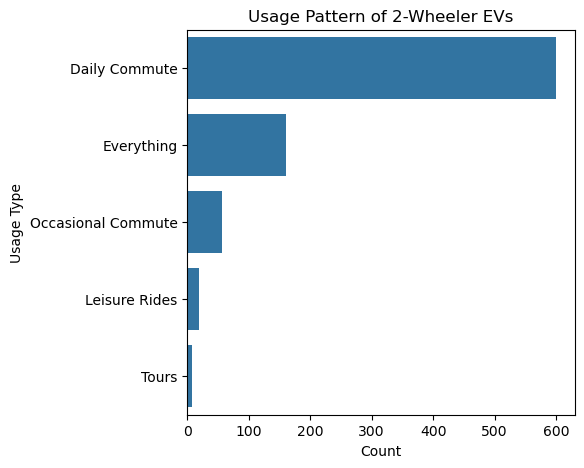

In [271]:
# Usage Pattern Analysis
plt.figure(figsize=(5, 5))
sns.countplot(y=two_wheeler["Used it for"], order=two_wheeler["Used it for"].value_counts().index)
plt.title("Usage Pattern of 2-Wheeler EVs")
plt.xlabel("Count")
plt.ylabel("Usage Type")
plt.show()

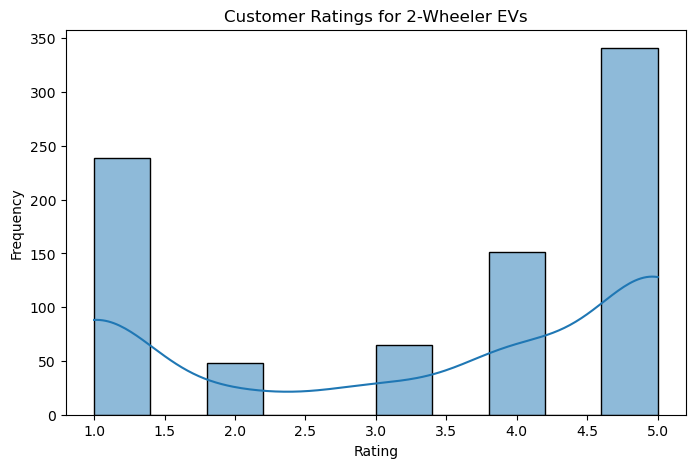

In [272]:
# Customer Satisfaction Analysis (Ratings)
plt.figure(figsize=(8, 5))
sns.histplot(two_wheeler["rating"], bins=10, kde=True)
plt.title("Customer Ratings for 2-Wheeler EVs")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

### **Behavioral Analysis**  
- **Primary Use of EVs:** Daily commutes  
- **Customer Satisfaction (Ratings):**  
  - **5.0-star rating** received the highest frequency (**350 customers**) 

### Clustering Analysis on Demographics

In [273]:
# Select relevant columns
demo_data = demographics[['Age', 'Salary', 'Total Salary']]

# Normalize the data
scaler = StandardScaler()
demo_data_scaled = scaler.fit_transform(demo_data)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=0)
demographics['Cluster'] = kmeans.fit_predict(demo_data_scaled)

In [274]:
demo_data.head()

,Age,Salary,Total Salary
0,-1.498630,-1.397118,-1.406760
1,-0.211304,-0.501877,-0.258937
2,1.397855,0.094950,-0.450240
3,0.754191,-0.203464,-0.067633
4,-0.854967,0.094950,0.314975


In [275]:
demographics.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price,Log_Salary,Cluster
0,-1.498630,1,Single,Post Graduate,0,Yes,No,No,-1.397118,0,-1.406760,i20,800000,13.592368,3
1,-0.211304,1,Married,Post Graduate,2,Yes,Yes,Yes,-0.501877,600000,-0.258937,Ciaz,1000000,14.151984,1
2,1.397855,0,Married,Graduate,4,Yes,Yes,No,0.094950,0,-0.450240,Duster,1200000,14.403298,2
3,0.754191,0,Married,Post Graduate,3,No,No,Yes,-0.203464,600000,-0.067633,City,1200000,14.285515,2
4,-0.854967,1,Married,Post Graduate,2,Yes,No,Yes,0.094950,800000,0.314975,SUV,1600000,14.403298,1


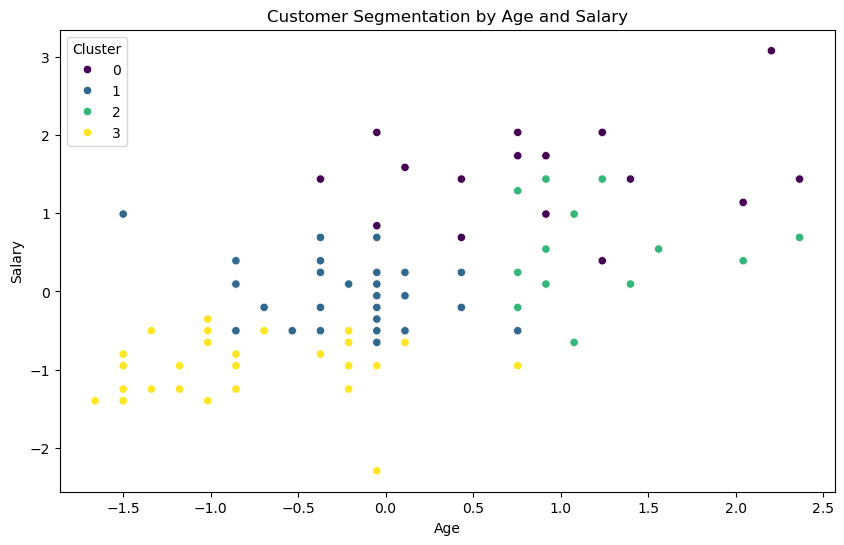

In [276]:
# Plotting the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Salary', hue='Cluster', data=demographics, palette='viridis')
plt.title('Customer Segmentation by Age and Salary')
plt.show()

### For 'Total Salary' column from Demographic dataset

In [277]:
# Check for missing values in the 'Total Salary' column
print(demographics['Total Salary'].isnull().sum())

0


In [278]:
# Basic statistics
print(demographics['Total Salary'].describe())

count    9.900000e+01
mean     6.490319e-17
std      1.005089e+00
min     -1.980672e+00
25%     -6.893704e-01
50%     -1.632846e-01
75%      4.106271e-01
max      2.801926e+00
Name: Total Salary, dtype: float64


In [279]:
demographics['Total Salary'] = demographics['Total Salary'].fillna(demographics['Total Salary'].median())

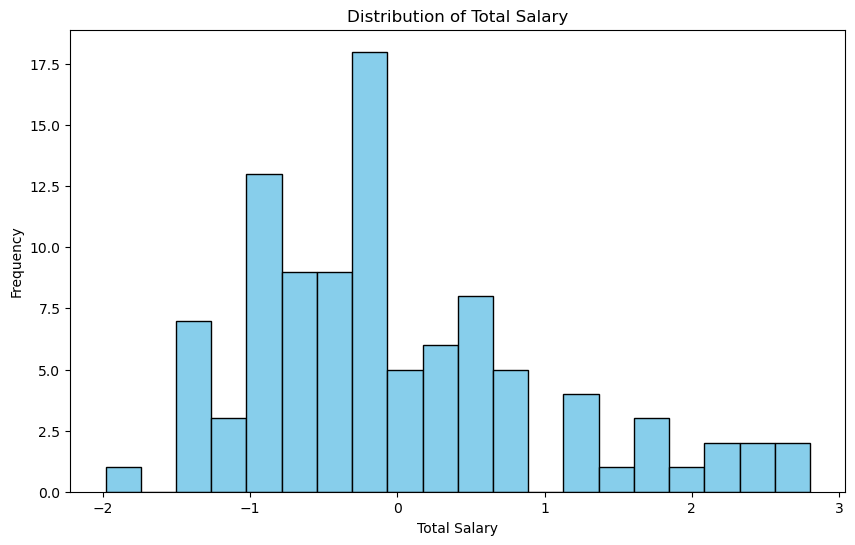

In [280]:
# Plot a histogram of the 'Total Salary' column
plt.figure(figsize=(10, 6))
plt.hist(demographics['Total Salary'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Total Salary')
plt.xlabel('Total Salary')
plt.ylabel('Frequency')
plt.show()

In [281]:
print("Minimum Total Salary for demographics dataset is : ", end="")
print(min(demographics['Total Salary']))

print("Maximum Total Salary for demographics dataset is : ", end="")
print(max(demographics['Total Salary']))

print("Median of Total Salary for demographics dataset is : ", end="")
print((demographics['Total Salary']).median())

Minimum Total Salary for demographics dataset is : -1.9806717060622308
Maximum Total Salary for demographics dataset is : 2.801925828088034
Median of Total Salary for demographics dataset is : -0.1632846430851302


In [282]:
# Create categories based on salary ranges
def salary_category(salary):
    if salary <= 1000000:
        return 'Low Salary'
    elif 1000000 < salary <= 2050000:
        return 'Medium Salary'
    else:
        return 'High Salary'

# Apply the function to the 'Total Salary' column to create a new column
demographics['Salary Category'] = demographics['Total Salary'].apply(salary_category)

# Check the distribution of the salary categories
print(demographics['Salary Category'].value_counts())


Salary Category
Low Salary    99
Name: count, dtype: int64


### Applying K-Means Clustering

In [283]:
# Select relevant columns for clustering
demographics_for_clustering = demographics[['Age', 'No of Dependents', 'Total Salary', 'Price']]

# Normalize the data
scaler = StandardScaler()
demographics_scaled = scaler.fit_transform(demographics_for_clustering)

# Elbow method to determine the number of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(demographics_scaled)
    inertia.append(kmeans.inertia_)


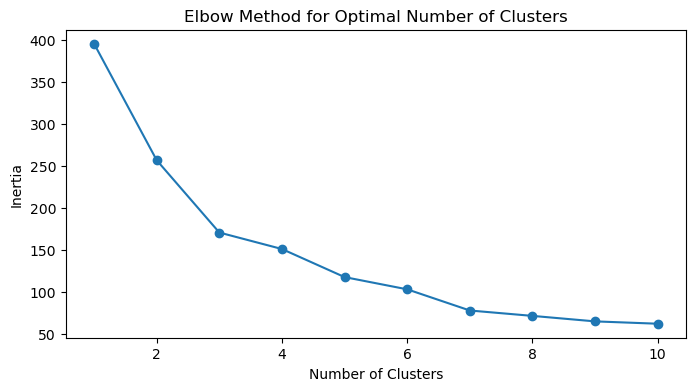

In [284]:
# Plot the elbow graph
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

### Applying K-Means clustering with the chosen number of clusters

In [285]:
# let's assume k=3
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
demographics['Cluster'] = kmeans.fit_predict(demographics_scaled)
demographics.head()


,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price,Log_Salary,Cluster,Salary Category
0,-1.498630,1,Single,Post Graduate,0,Yes,No,No,-1.397118,0,-1.406760,i20,800000,13.592368,0,Low Salary
1,-0.211304,1,Married,Post Graduate,2,Yes,Yes,Yes,-0.501877,600000,-0.258937,Ciaz,1000000,14.151984,2,Low Salary
2,1.397855,0,Married,Graduate,4,Yes,Yes,No,0.094950,0,-0.450240,Duster,1200000,14.403298,2,Low Salary
3,0.754191,0,Married,Post Graduate,3,No,No,Yes,-0.203464,600000,-0.067633,City,1200000,14.285515,2,Low Salary
4,-0.854967,1,Married,Post Graduate,2,Yes,No,Yes,0.094950,800000,0.314975,SUV,1600000,14.403298,1,Low Salary


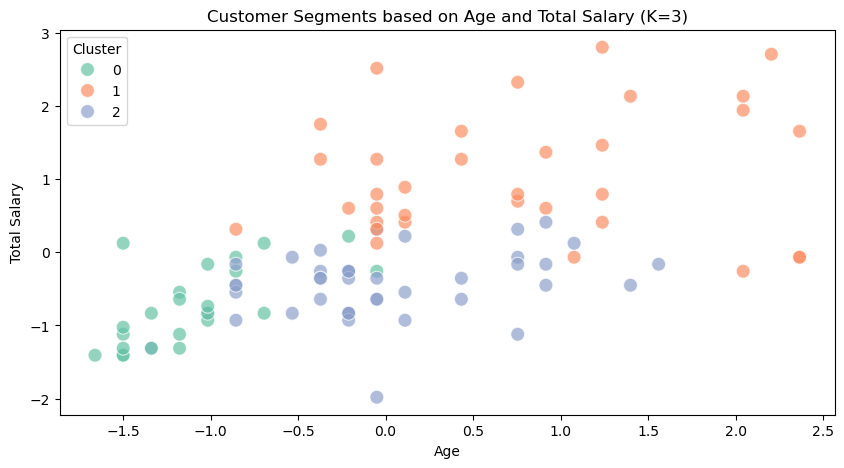

In [286]:
# Visualizing clusters based on Age and Salary
plt.figure(figsize=(10, 5))
sns.scatterplot(x=demographics['Age'], y=demographics['Total Salary'], hue=demographics['Cluster'], palette='Set2', s=100, alpha=0.7)
plt.title(f'Customer Segments based on Age and Total Salary (K={k})')
plt.xlabel('Age')
plt.ylabel('Total Salary')
plt.legend(title='Cluster')
plt.show()

### Analyzing the Clusters

In [287]:
# Calculate the mean of each demographic feature for each cluster
cluster_summary = demographics.groupby('Cluster').agg({
    'Age': 'mean',
    'Salary': 'mean',
    'Total Salary': 'mean',
    'No of Dependents': 'mean',
    'Marrital Status': 'value_counts',
    'Education': 'value_counts',
    'Profession': 'value_counts',
})

# Display the cluster summary
cluster_summary

,Age,Salary,Total Salary,No of Dependents,Marrital Status,Education,Profession
0,-1.106835,-0.761367,-0.741355,0.086957,NaN,NaN,NaN
1,0.763657,0.902422,1.060498,2.588235,NaN,NaN,NaN
2,-0.012074,-0.313593,-0.452518,3.000000,NaN,NaN,NaN
"(0, Single)",NaN,NaN,NaN,NaN,14.0,NaN,NaN
"(0, Married)",NaN,NaN,NaN,NaN,9.0,NaN,NaN
"(1, Married)",NaN,NaN,NaN,NaN,34.0,NaN,NaN
"(2, Married)",NaN,NaN,NaN,NaN,41.0,NaN,NaN
"(2, Single)",NaN,NaN,NaN,NaN,1.0,NaN,NaN
"(0, Post Graduate)",NaN,NaN,NaN,NaN,NaN,13.0,NaN
"(0, Graduate)",NaN,NaN,NaN,NaN,NaN,10.0,NaN


### For State and EV Maker

In [288]:
fig = px.histogram(ev_maker_place, x="EV Maker", color="State", barmode="stack")
fig.update_layout(
    title="EV Maker Distribution by State",
    xaxis_title="EV Maker",
    yaxis_title="Count",
    xaxis_tickangle=-45,  # Angle for better readability
    autosize=True,
    xaxis={'tickmode': 'array', 'tickvals': ev_maker_place['EV Maker'].unique()}, 
    margin=dict(l=100, r=100, t=100, b=200), 
    dragmode="pan",  # Allow scrolling
    height=800,  
    width=3000,  
)

fig.update_xaxes(showticklabels=True, tickmode='linear')

fig.show()


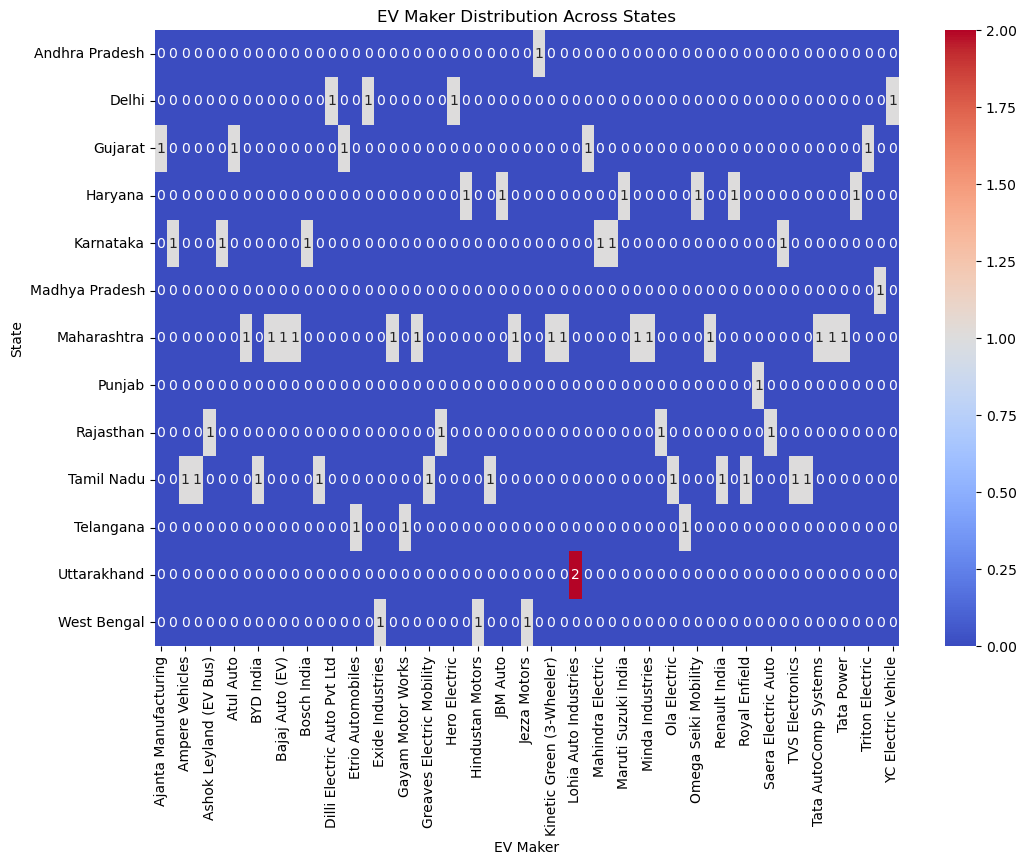

In [289]:
# Heatmap for EV Makers across States
ev_maker_state_matrix = ev_maker_place.pivot_table(index='State', columns='EV Maker', aggfunc='size', fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(ev_maker_state_matrix, annot=True, cmap='coolwarm', fmt="d")
plt.title('EV Maker Distribution Across States')
plt.show()

### For Charging Stations

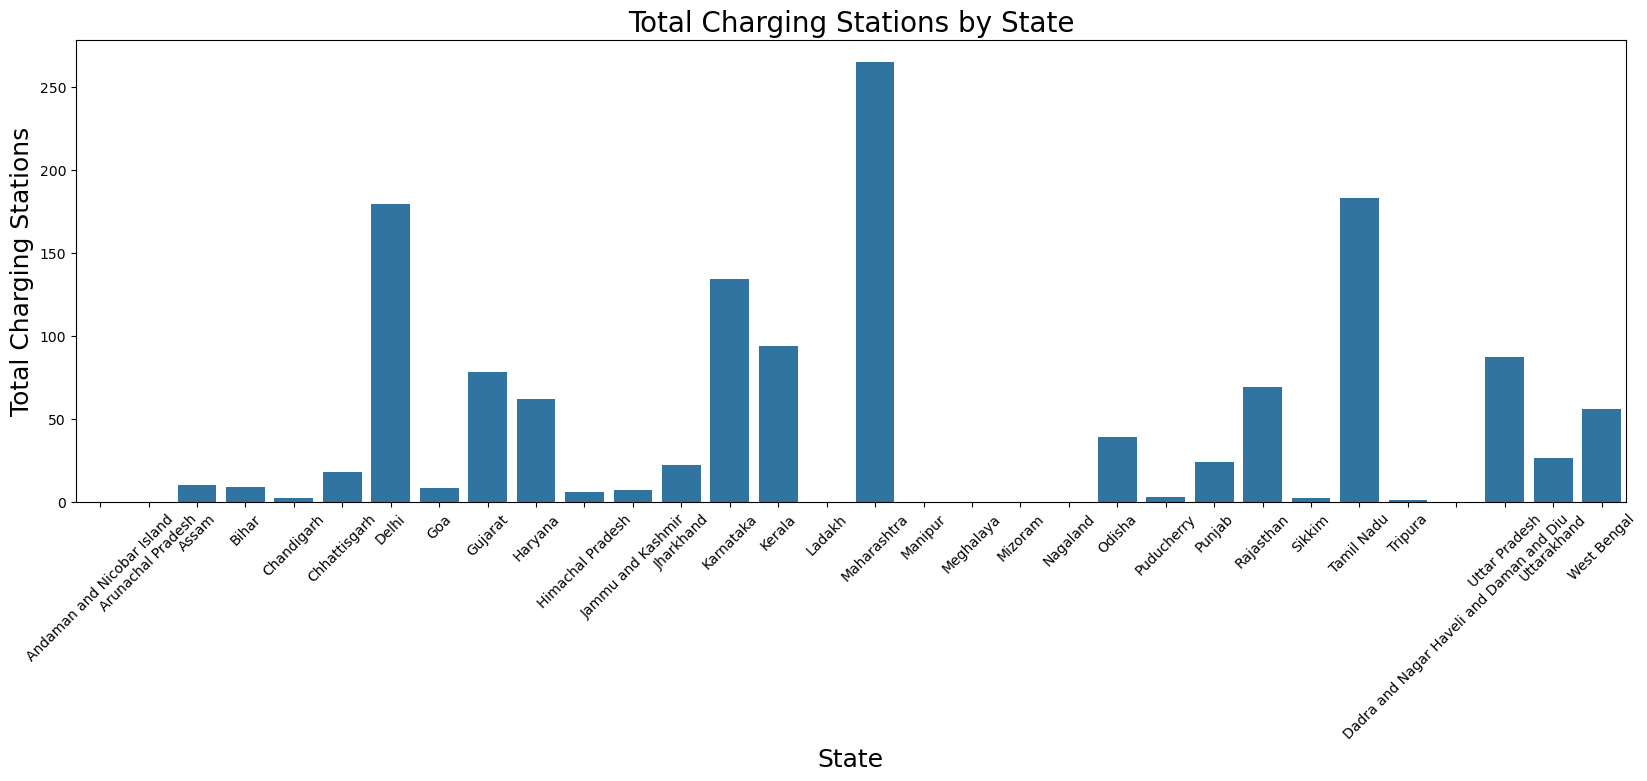

In [290]:
plt.figure(figsize=(20, 6))
sns.barplot(data=final_dataset, x='State Name', y='total-charging-stations')
plt.title('Total Charging Stations by State', fontdict={'fontsize': 20})
plt.xlabel('State', fontdict={'fontsize': 18})
plt.ylabel('Total Charging Stations', fontdict={'fontsize': 18})
plt.xticks(rotation=45)
plt.show()

### On Ridden for and Comfort in Two-Wheeler Dataset

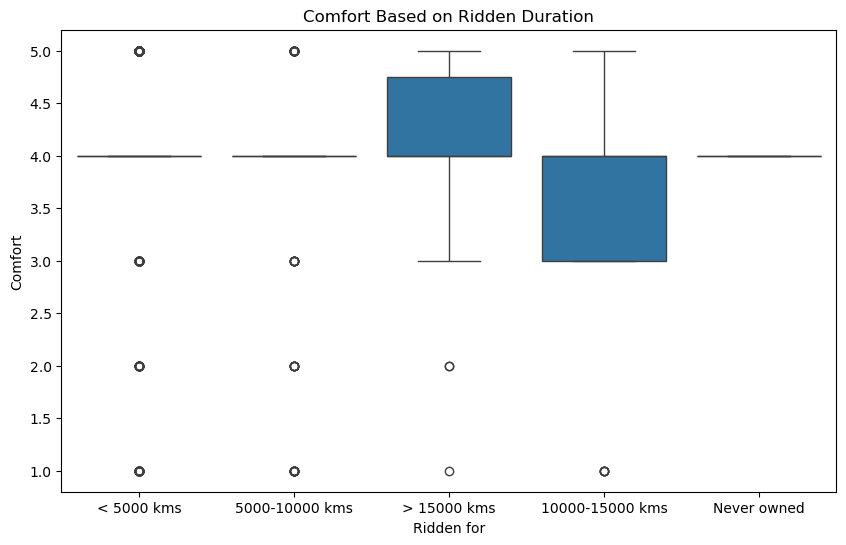

In [291]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=two_wheeler, x='Ridden for', y='Comfort')
plt.title('Comfort Based on Ridden Duration')
plt.xlabel('Ridden for')
plt.ylabel('Comfort')
plt.show()

### On Charging Infrastructure in Each State

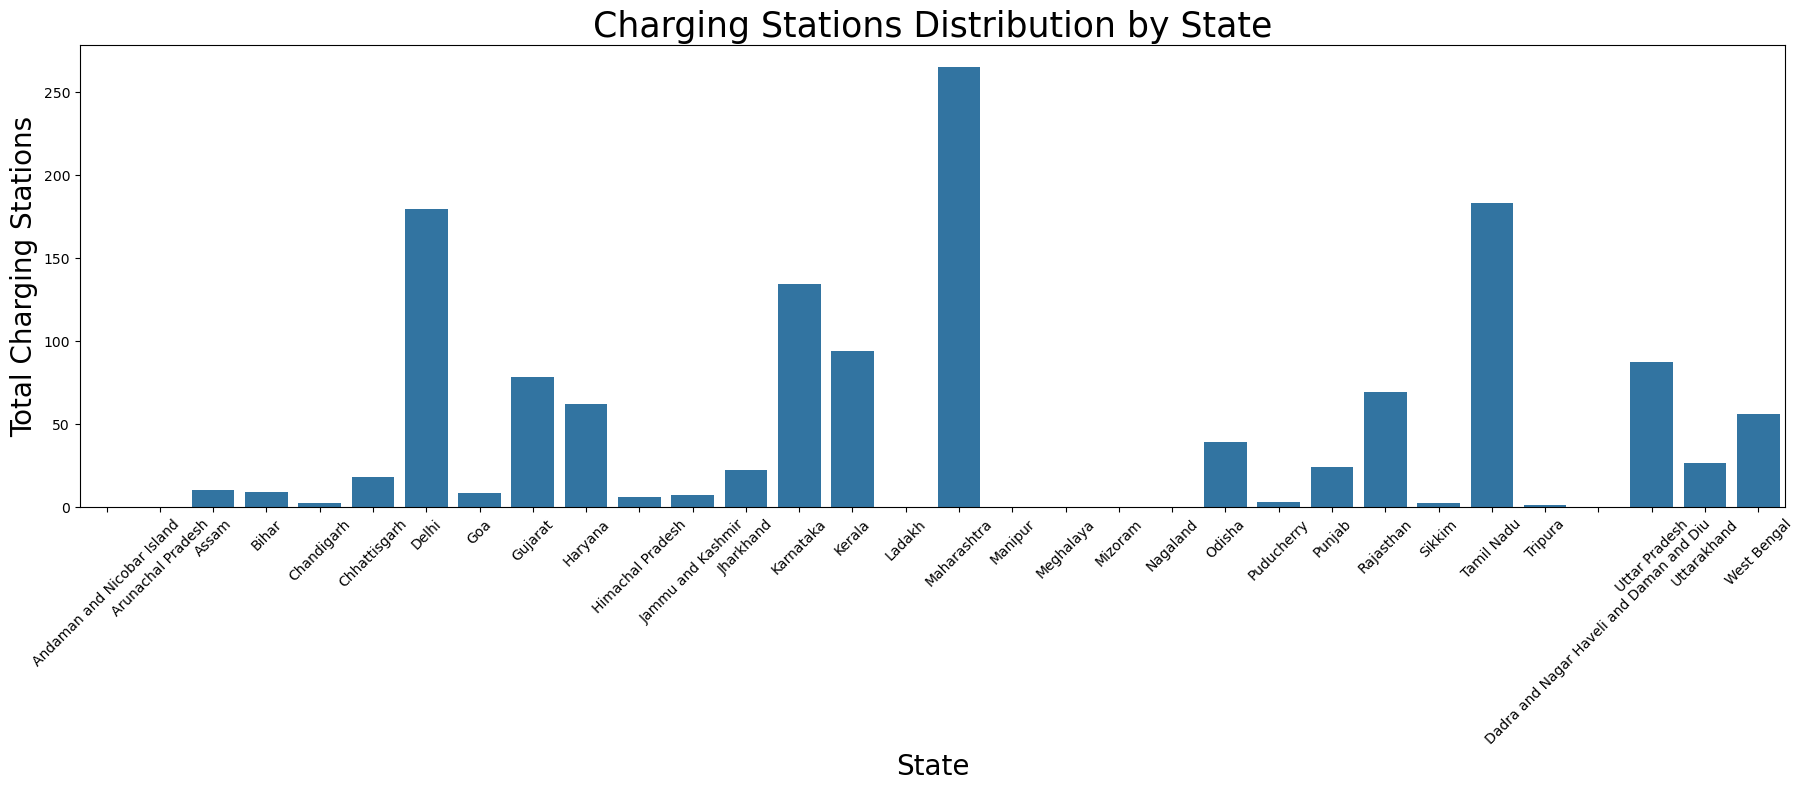

In [292]:
plt.figure(figsize=(22, 6))
sns.barplot(data=final_dataset, x='State Name', y='total-charging-stations')
plt.title('Charging Stations Distribution by State', fontsize=25)
plt.xlabel('State', fontsize=20)
plt.ylabel('Total Charging Stations', fontsize=20)
plt.xticks(rotation=45)
plt.show()

### Using Customer Feedback from Two-Wheeler Dataset

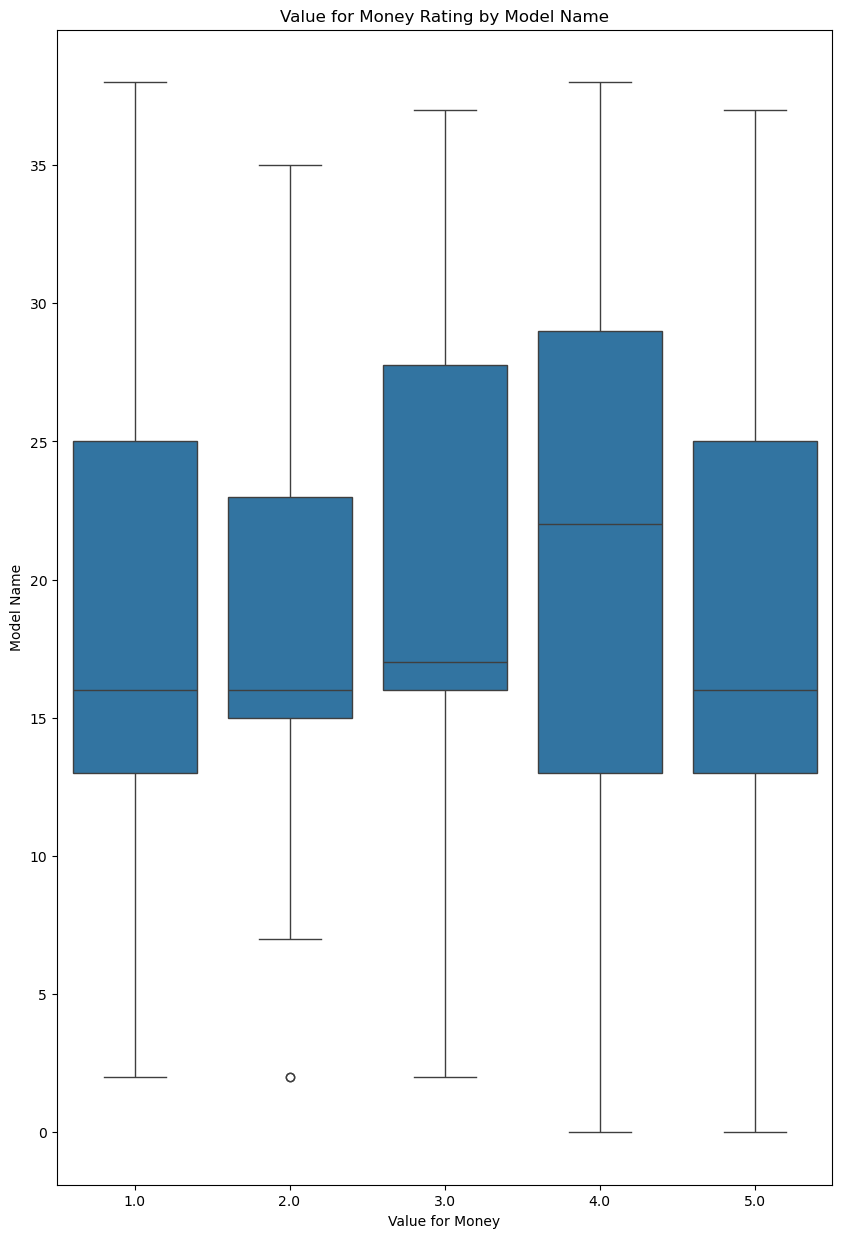

In [293]:
# Segmentation based on Value for Money Rating
plt.figure(figsize=(10, 15))
sns.boxplot(data=two_wheeler, x='Value for Money', y='Model Name')
plt.title('Value for Money Rating by Model Name')
plt.xlabel('Value for Money')
plt.ylabel('Model Name')
plt.show()


### Clustering Two-Wheeler Dataset

In [294]:
# Extract features for clustering in Two-Wheeler dataset (ratings)
X_two_wheeler = two_wheeler[['rating', 'Reliability', 'Performance', 'Service Experience']]

# Apply KMeans clustering
kmeans_two_wheeler = KMeans(n_clusters=4, random_state=42)
two_wheeler['Cluster'] = kmeans_two_wheeler.fit_predict(X_two_wheeler)

two_wheeler.head()

,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money,Model Name,review,Cluster
0,Daily Commute,Never owned,< 5000 kms,1,3.0,4.0,4.0,5.0,1.0,4.0,4.0,1.0,33,We all checked the bike's capacity to be 150 k...,3
1,Everything,> 1 yr,< 5000 kms,1,3.0,1.0,4.0,1.0,1.0,3.0,4.0,3.0,33,Performance is very poor on this bike. The cha...,1
2,Daily Commute,< 3 months,< 5000 kms,3,4.0,4.0,4.0,2.0,1.0,5.0,4.0,2.0,33,I purchased this in April 2022 and the sales s...,2
3,Daily Commute,6 months-1 yr,5000-10000 kms,1,1.0,1.0,4.0,1.0,1.0,1.0,4.0,1.0,33,If any issues come in scooty parts not availab...,1
4,Daily Commute,6 months-1 yr,< 5000 kms,1,3.0,4.0,4.0,1.0,1.0,3.0,4.0,2.0,33,Don't buy this vehicle unless you have a near ...,1


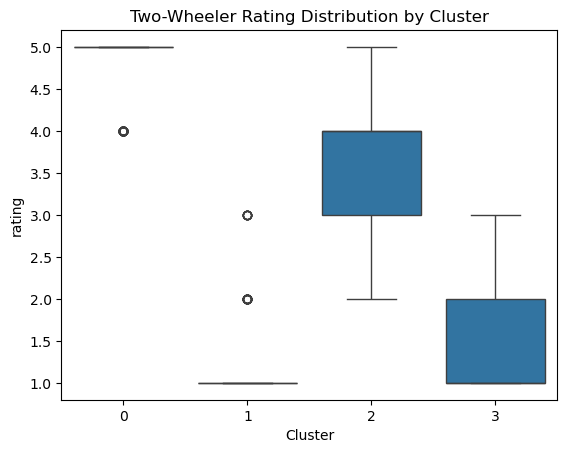

In [295]:
# Visualizing the clusters in Two-Wheeler dataset
sns.boxplot(x='Cluster', y='rating', data=two_wheeler)
plt.title('Two-Wheeler Rating Distribution by Cluster')
plt.show()

## Step-5: Profiling and Describing Segments

### Profiling Demographics Clusters

In [296]:
profile_demographics = demographics.groupby('Cluster').agg({
    'Age': 'mean',
    'Salary': 'mean',
    'Total Salary': 'mean',
    'No of Dependents': 'mean',
}).reset_index()
profile_demographics


,Cluster,Age,Salary,Total Salary,No of Dependents
0,0,-1.106835,-0.761367,-0.741355,0.086957
1,1,0.763657,0.902422,1.060498,2.588235
2,2,-0.012074,-0.313593,-0.452518,3.000000


In [297]:
# Profiling Two-Wheeler Clusters
profile_two_wheeler = two_wheeler.groupby('Cluster').agg({
    'rating': 'mean',
    'Reliability': 'mean',
    'Performance': 'mean',
    'Service Experience': 'mean',
}).reset_index()

profile_two_wheeler


,Cluster,rating,Reliability,Performance,Service Experience
0,0,4.832891,4.793103,4.291777,4.771883
1,1,1.173729,1.355932,2.889831,1.224576
2,2,3.818182,3.454545,3.957576,3.206061
3,3,1.666667,4.787879,3.939394,4.530303


## Step-6: Potential Profit for Each Segment

In [298]:
print("Minimum Price of Two-Wheelers is:", min(demographics['Price']))

print("Maximum Price of Two-Wheelers is:", max(demographics['Price']))

Minimum Price of Two-Wheelers is: 110000
Maximum Price of Two-Wheelers is: 3000000


In [299]:
X = demographics[['Price', 'Total Salary', 'Age']]  # Replace with relevant columns

# Apply KMeans clustering for segmentation
kmeans = KMeans(n_clusters=3, random_state=42)
demographics['Segment'] = kmeans.fit_predict(X)

# Display the segmentation result
demographics[['Price', 'Total Salary', 'Age', 'Segment']].head()

,Price,Total Salary,Age,Segment
0,800000,-1.406760,-1.498630,1
1,1000000,-0.258937,-0.211304,1
2,1200000,-0.450240,1.397855,0
3,1200000,-0.067633,0.754191,0
4,1600000,0.314975,-0.854967,0


In [300]:
# Calculate the average price per segment
segment_profit = demographics.groupby('Segment')['Price'].agg(['mean', 'count'])

# Calculate potential profit (Potential Customer Base * Average Price)
segment_profit['Potential Profit'] = segment_profit['mean'] * segment_profit['count']

# Display the results
segment_profit

,mean,count,Potential Profit
Segment,,,
0,1.440385e+06,52,74900000.0
1,8.291111e+05,45,37310000.0
2,3.000000e+06,2,6000000.0


## Step-7: Select the Target Segment

In [301]:
# Sorting to find the segment with the highest potential profit
best_segment = segment_profit.sort_values(by='Potential Profit', ascending=False).head(1)

# Display the best segment
print("Best Target Segment: ")
best_segment

Best Target Segment: 


,mean,count,Potential Profit
Segment,,,
0,1.440385e+06,52,74900000.0


## Step-8: Customizing Marketing Mix

In [302]:
# Sample target segment based on income and price (for example: medium-income, medium-price range)
target_segment = demographics[demographics['Segment'] == 1]  # Segment 1 is Medium Price

# Tailor the product strategy
target_product = "Premium product with additional features that match medium-income customers' expectations."

# Tailor the price strategy
target_price = target_segment['Price'].mean()  # Average price in the target segment
target_price_range = (target_price * 0.9, target_price * 1.1)  # Price range within 10% variation

# Tailor the place strategy
distribution_channels = ["Online Marketplace", "Retail Partners in Key Locations"]

# Tailor the promotion strategy
promotion_strategy = "Social media ads targeting medium-income professionals. Special discounts for early adopters."

In [303]:
# Display the customized marketing mix
print("Customized Marketing Mix for the Target Segment:\n")
print(f"Product Strategy: {target_product}\n")
print(f"Price Range: {target_price_range}\n")
print(f"Distribution Channels: {distribution_channels}\n")
print(f"Promotion Strategy: {promotion_strategy}\n")

Customized Marketing Mix for the Target Segment:

Product Strategy: Premium product with additional features that match medium-income customers' expectations.

Price Range: (746200.0, 912022.2222222224)

Distribution Channels: ['Online Marketplace', 'Retail Partners in Key Locations']

Promotion Strategy: Social media ads targeting medium-income professionals. Special discounts for early adopters.



## Step-9: Potential Sale (Profit)

In [304]:
# Calculate the potential customer base for the target segment
target_customer_base = target_segment['Segment'].count()

# Estimate the potential sale (Profit) for early market
potential_profit = target_customer_base * target_price_range[0]  # Lower bound price
print(f"Estimated Potential Profit for Early Market: {potential_profit:.2f}")


Estimated Potential Profit for Early Market: 33579000.00


### Profit from the High End of the Price Range

In [305]:
# Estimate potential sale (Profit) at the higher price point
potential_profit_high = target_customer_base * target_price_range[1]  # Upper bound price
print(f"Estimated Potential Profit for Early Market (High Price): {potential_profit_high:.2f}")

Estimated Potential Profit for Early Market (High Price): 41041000.00


## Step-10: Identify the Most Optimal Market Segment to Open

In [306]:
# Sort segments by potential profit to find the optimal segment to open
optimal_segment = segment_profit.sort_values(by='Potential Profit', ascending=False).head(1)
print(f"Most Optimal Market Segment to Open: \n{optimal_segment}")


Most Optimal Market Segment to Open: 
                 mean  count  Potential Profit
Segment                                       
0        1.440385e+06     52        74900000.0
